# Lineární hyperbolický systém PDR 1. řádu

**Definice:**
Systém PDR ve tvaru $U_t + A U_x = 0$, kde $U: \mathbb R\times\mathbb R_+ \to \mathbb R^l$ a $A \in \mathbb R^{l,l}$ nazveme *hyperbolickým* právě tehdy, když matice $A$ má $l$ reálných vlastních čísel a $l$ lineárně nezávislých vlastních vektorů.



## Charakteristické proměnné

Splňuje-li $A$ výše uvedené podmínky, je možné ji rozložit na součin
$$
    A = R \Lambda R^{-1},
$$
kde $\Lambda=diag(\lambda_1, \lambda_2, ..., \lambda_l)$ je diagonální matice a $R$ obsahuje ve sloupcích příslušné vlastní vektory, tj. $R=[\vec{r}_1, \vec{r}_2, ..., \vec{r}_l]$. 

Systém pak lze přepsat jako
$$
U_t + R \Lambda R^{-1} U_x = 0
$$
a po vynásobení maticí $R^{-1}$ zleva dostáváme
$$
R^{-1} U_t + R^{-1} R \Lambda R^{-1} U_x = (R^{-1} U)_t + E \Lambda (R^{-1} U)_x = 0.
$$

Označíme-li $V = R^{-1} U$, je původní systém ekvivalentní systému $l$ nezávislých rovnic 
$$
    V_t + \Lambda V_x = 0
$$
což je po složkách
$$
    \frac{\partial v_k}{\partial t} + \lambda_k \frac{\partial v_k}{\partial x} = 0.
$$

**Definice:** Mějme hyperbolický systém $U_t + A U_x = 0$. Proměnné $V = R^{-1} U$, kde $R$ je matice složená z vlastních vektorů matice $A$, nazveme *cahrakteristickými proměnnými*.

## Počáteční úloha pro lineární hyperbolický systém

**Definice:** Je dán hyperbolický systém $U_t + A U_x=0$ a vektorová funkce $U_0 \in C^1(\mathbb R \to \mathbb R^l)$ (počáteční podmínka). Počáteční úlohou pro tento systém s danou počáteční podmínkou budeme rozumět nalezení takové funkce $U \in C^1( \mathbb R\times\mathbb R_+ \to \mathbb R^l)$, že $\forall x \in \mathbb R$ a $\forall t > 0$ funkce $U$ vyhovuje danému systému a pro $t=0$ je $U(x,0)=u_0(x)$.

*Poznámka:* pro případ nespojité počáteční podmínky je třeba přejít ke slabému řešení.

Pro skalární problém  $v_t + \lambda v_x=0$ umíme pomocí metody charakteristik určit řešení jako $v(x,t) = v_0(x - \lambda t)$. Proto lze (v charakteristických proměnných) zapsat řešení počáteční úlohy jako
$$
    v_k(x,t) = v_k^0(x-\lambda_k t),
$$
kde $v_k^0$ je $k$-tá zložka vektoru $V^ = R^{-1} U_0$ a v původních $U$ je to tedy
$$
    U(x,t) = \sum_{k=1}^l \vec{r}_k v_k(x,t) = \sum_{k=1}^l \vec{r}_k v_k^0(x - \lambda_k t).
$$


## Příklad: linearizovaný systém Eulerových rovnic v 1D

Nelineární systém Eulerových rovnic v 1D lze zapsat jako
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 (\rho u)_t + (\rho u^2 + p)_x &= 0, \\
 (\rho E)_t + [(\rho E + p) u]_x &= 0,
\end{align*}
kde $\rho$ je hustota, $u$ je rychlost, $p$ je tlak a $E$ je celková energie vztažená na kg. Pro ideální plyn je ze stavové rovnice
$
    p = (\gamma-1)(\rho E - \frac{1}{2} \rho u^2).
$

Předpokládáme-li, že všechny valičiny mají spojité derivace, lze systém převést na tvar
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 u_t + u u_x + \frac{1}{\rho} p_x &= 0, \\
 p_t + u p_x + \gamma p u_x &= 0.
\end{align*}

Systém linearizujeme ($\rho(x,t) = \bar{\rho} + \rho'(x,t)$, podobně pro $u$ a $p$) a dostáváme
\begin{align*}
 \rho_t + \bar{u} \rho_x + \bar{\rho} u_x &= 0, \\
 u_t + \bar{u} u_x + \frac{1}{\bar\rho} p_x &= 0, \\
 p_t + \gamma \bar{p} u_x + \bar{u} p_x &= 0.
\end{align*}

Označme $U=[\rho, u, p]$. Potom dostáváme systém $U_t + A U_x = 0$ s maticí
$$
A = \begin{pmatrix}
\bar{u} & \bar{\rho} & 0 \\
0 & \bar{u} & 1/\bar{\rho} \\
0 & \gamma \bar{p} & \bar{u}
\end{pmatrix}.
$$


In [1]:
using SymPy

In [2]:
rhoBar, pBar, aBar, gamma = symbols("rhoBar pBar aBar gamma", positive=true);
uBar = symbols("uBar");

In [3]:
A = [uBar rhoBar 0; 0 uBar 1/rhoBar; 0 gamma*pBar uBar]

3×3 Array{SymPy.Sym,2}:
 uBar      rhoBar         0
    0        uBar  1/rhoBar
    0  gamma*pBar      uBar

In [4]:
λ = eigvals(A);
[λ[1] λ[2] λ[3]]

1×3 Array{SymPy.Sym,2}:
 -(sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar)  …  uBar

In [5]:
for i=1:3
    λ[i] = simplify(subs(λ[i],gamma,rhoBar*aBar^2/pBar))
end
[λ[1] λ[2] λ[3]]

1×3 Array{SymPy.Sym,2}:
 -aBar + uBar  aBar + uBar  uBar

In [6]:
r1 = eigvecs(A)[1];
r2 = map(simplify, subs(eigvecs(A)[2], gamma,rhoBar*aBar^2/pBar))
r3 = map(simplify, subs(eigvecs(A)[3], gamma,rhoBar*aBar^2/pBar))

R = [r1 r2.//2 r3.//2]

3×3 Array{SymPy.Sym,2}:
 1        1/(2*aBar^2)       1/(2*aBar^2)
 0  -1/(2*aBar*rhoBar)  1/(2*aBar*rhoBar)
 0                 1/2                1/2

In [7]:
R1 = inv(R)

3×3 Array{SymPy.Sym,2}:
 1             0  -1/aBar^2
 0  -aBar*rhoBar          1
 0   aBar*rhoBar          1

In [8]:
rho, u, p = symbols("rho u p")

(rho, u, p)

In [9]:
U = [rho, u, p]

3-element Array{SymPy.Sym,1}:
 rho
   u
   p

In [10]:
V = R1 * U

3-element Array{SymPy.Sym,1}:
     rho - p/aBar^2
 -aBar*rhoBar*u + p
  aBar*rhoBar*u + p

#### Šíření poruchy pro případ linearizovaných Eulerových rovnic

* analytické rešení

In [11]:
using PyPlot

In [12]:
ρ̄ = 1.2;
ā = 340.0;
ū = 100.0;
κ = 1.4;
p̄ = ρ̄ * ā^2 / κ;

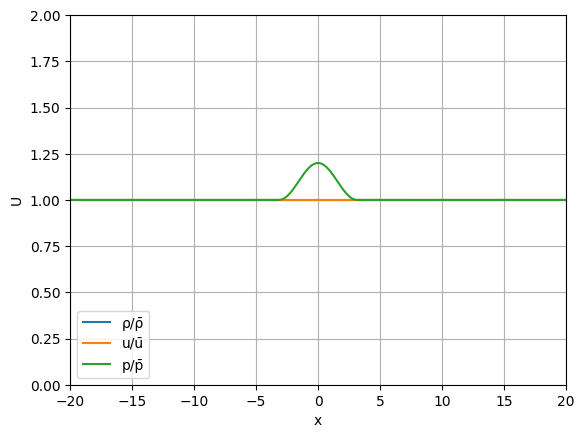

In [13]:
function U0(x)
    U = [ρ̄, ū, p̄]
    if abs(x) < π 
        U[3] += 0.1 * (1 + cos(x)) * p̄
    end
    return U
end

x = linspace(-20, 20, 200);
plot(x, [ U0(ξ)[1]/ρ̄ for ξ in x], label="ρ/ρ̄")
plot(x, [ U0(ξ)[2]/ū for ξ in x], label="u/ū")
plot(x, [ U0(ξ)[3]/p̄ for ξ in x], label="p/p̄")

xlim(-20,20); ylim(0,2); grid(true);
xlabel("x"); ylabel("U");
legend(loc="lower left");

In [14]:
R₀ =[1 0 0;  0.5/ā^2 -0.5/ā/ρ̄ 0.5;  0.5/ā^2 0.5/ā/ρ̄  0.5]'

3×3 Array{Float64,2}:
 1.0   4.32526e-6  4.32526e-6
 0.0  -0.00122549  0.00122549
 0.0   0.5         0.5       

In [15]:
R₁ = inv(R₀)
Λ = [ū, ū-ā, ū+ā]

3-element Array{Float64,1}:
  100.0
 -240.0
  440.0

In [16]:
V0(x) = R₁ *  U0(x)

V0 (generic function with 1 method)

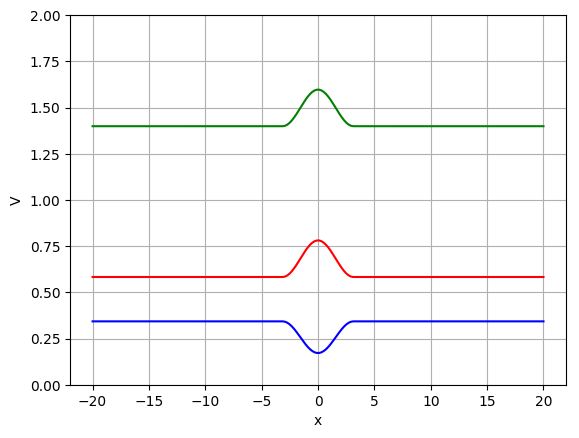

In [17]:
plot(x, [V0(ξ)[1]  for ξ in x], "-b")
plot(x, [V0(ξ)[2]/1e5  for ξ in x], "-r")
plot(x, [V0(ξ)[3]/1e5  for ξ in x], "-g")
ylim(0,2); grid(true);
xlabel("x"); ylabel("V");

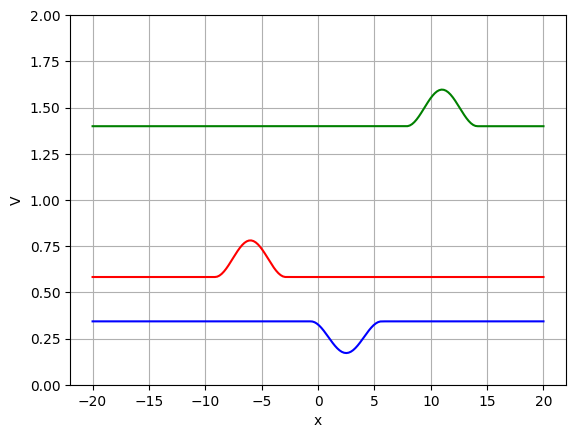

In [18]:
Vexact(x,t) = [ V0(x-Λ[1]*t)[1], V0(x-Λ[2]*t)[2], V0(x-Λ[3]*t)[3]  ]

t=0.025

plot(x, [Vexact(xi,t)[1]  for xi in x], "-b")
plot(x, [Vexact(xi,t)[2]/1e5  for xi in x], "-r")
plot(x, [Vexact(xi,t)[3]/1e5  for xi in x], "-g")
ylim(0,2); grid(true)
xlabel("x"); ylabel("V");

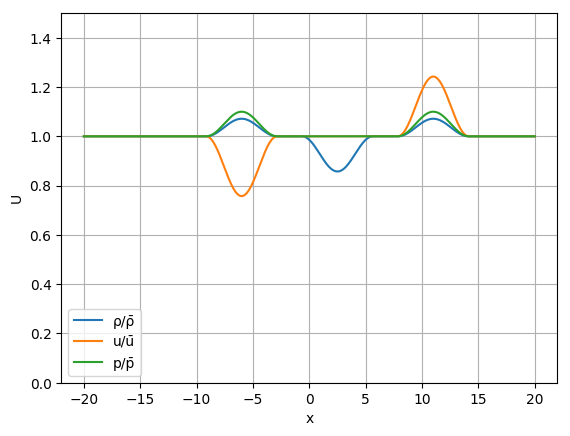

In [19]:
Uexact(x,t) = R₀ * Vexact(x,t)

plot(x, [Uexact(xi,t)[1]/ρ̄  for xi in x], label="ρ/ρ̄")
plot(x, [Uexact(xi,t)[2]/ū  for xi in x], label="u/ū")
plot(x, [Uexact(xi,t)[3]/p̄  for xi in x], label="p/p̄")
xlabel("x"); ylabel("U");
ylim(0,1.5);
grid(true);  legend(loc="lower left");